<a href="https://colab.research.google.com/github/fred-creator-creat/desafio-transfer-learning-dio/blob/main/Desafio_Transfer_Learning_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ---------------------------------------------------------------------------
# PROJETO: Treinamento de Redes Neurais com Transfer Learning
# ESTUDANTE: [Frederico Cavalheiro de Oliveira]
# ---------------------------------------------------------------------------

import tensorflow as tf
import matplotlib.pyplot as plt
import os

# Exibe a versão do TensorFlow
print("Versão do TensorFlow:", tf.__version__)

# Confirmação de execução
print("Passo 1 concluído.")

Versão do TensorFlow: 2.19.0
Passo 1 concluído.


In [2]:
import tensorflow_datasets as tfds

# Carrega o dataset de gatos e cachorros diretamente pelo TensorFlow
# split=['train[:80%]', 'train[80%:]'] divide os dados em 80% para treino e 20% para teste
(train_data, validation_data), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
)

# Definimos os nomes das pastas para manter a compatibilidade com o plano
print("Passo 2 concluído: Imagens carregadas via TensorFlow Datasets.")
print(f"Total de imagens carregadas: {info.splits['train'].num_examples}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.8H6ZCE_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Passo 2 concluído: Imagens carregadas via TensorFlow Datasets.
Total de imagens carregadas: 23262


In [3]:
# Define o tamanho padrão das imagens (224x224 pixels)
IMG_SIZE = 224

def format_image(image, label):
    # Converte os pixels para números decimais
    image = tf.cast(image, tf.float32)
    # Normaliza os valores das cores para ficarem entre -1 e 1
    image = (image/127.5) - 1
    # Redimensiona a foto para o tamanho padrão
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

# Aplica a formatação e organiza as fotos em grupos de 32
train = train_data.map(format_image).batch(32)
validation = validation_data.map(format_image).batch(32)

print("Passo 3 concluído: Imagens redimensionadas e organizadas.")

Passo 3 concluído: Imagens redimensionadas e organizadas.


In [4]:
# Define o formato de entrada (224x224 com 3 cores)
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# 1. Carrega o modelo base pré-treinado (MobileNet V2) - Corrigido para 'imagenet'
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

# 2. Congelamos o modelo base
base_model.trainable = False

# 3. Criamos a estrutura final (topo da rede)
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(1)
])

# 4. Compilamos o modelo
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

print("Passo 4 concluído: Modelo criado e compilado com sucesso.")
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Passo 4 concluído: Modelo criado e compilado com sucesso.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [5]:
# Definimos o número de épocas (quantas vezes a IA verá todas as fotos)
initial_epochs = 3

# Iniciamos o treinamento
history = model.fit(train,
                    epochs=initial_epochs,
                    validation_data=validation)

print("Passo 5 concluído: Treinamento finalizado.")

Epoch 1/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 77s 105ms/step - accuracy: 0.7856 - loss: 0.3840 - val_accuracy: 0.9811 - val_loss: 0.0737
Epoch 2/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.9813 - loss: 0.0667 - val_accuracy: 0.9845 - val_loss: 0.0511
Epoch 3/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/step - accuracy: 0.9850 - loss: 0.0501 - val_accuracy: 0.9865 - val_loss: 0.0442
Passo 5 concluído: Treinamento finalizado.


In [6]:
# Salva o modelo treinado em um arquivo chamado 'meu_modelo_gatos_caes.h5'
model.save('meu_modelo_gatos_caes.h5')
print("Modelo salvo com sucesso! Agora você pode fechar o Colab sem perder o aprendizado.")

Modelo salvo com sucesso! Agora você pode fechar o Colab sem perder o aprendizado.


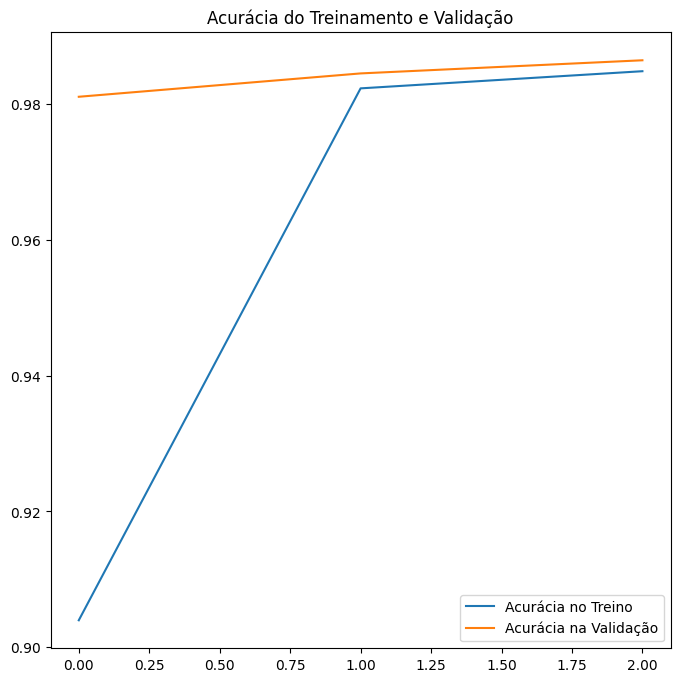

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Resultados do Teste:
Passo 7 concluído: Teste visual finalizado.


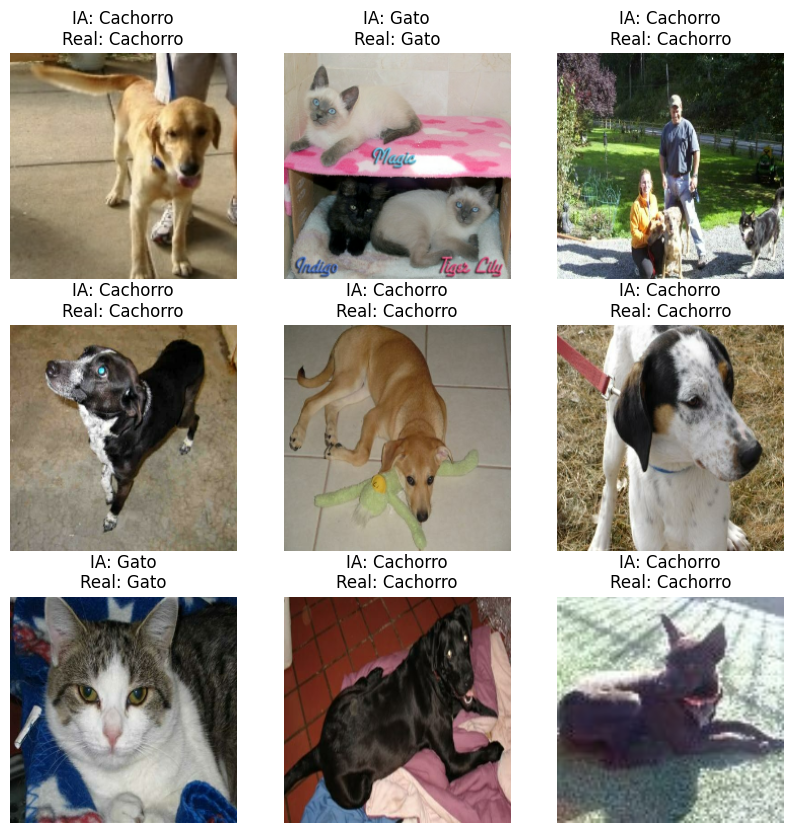

In [7]:
# ---------------------------------------------------------
# PASSO 6: Gráfico de Acurácia
# ---------------------------------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.plot(acc, label='Acurácia no Treino')
plt.plot(val_acc, label='Acurácia na Validação')
plt.legend(loc='lower right')
plt.title('Acurácia do Treinamento e Validação')
plt.show()

# ---------------------------------------------------------
# PASSO 7: Teste com Imagens Reais
# ---------------------------------------------------------
# Pega um grupo de imagens do conjunto de validação
image_batch, label_batch = next(iter(validation))
predictions = model.predict(image_batch)

# Aplica a função sigmoide para converter os resultados em probabilidades
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print("Resultados do Teste:")
class_names = ['Gato', 'Cachorro']

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow((image_batch[i] + 1) / 2) # Desnormaliza para exibir a cor real
  result = class_names[predictions[i][0]]
  label = class_names[label_batch[i]]
  plt.title(f"IA: {result}\nReal: {label}")
  plt.axis("off")

print("Passo 7 concluído: Teste visual finalizado.")